# ColaboratoryによるGPU環境

## データのダウンロード

以下のコマンドを実行してサンプルプログラムのzipファイル（RL_Book.zip）をダウンロードできます。

In [1]:
!wget https://www.shoeisha.co.jp/static/book/download/9784798159928/RL_Book.zip

--2019-07-29 04:12:40--  https://www.shoeisha.co.jp/static/book/download/9784798159928/RL_Book.zip
Resolving www.shoeisha.co.jp (www.shoeisha.co.jp)... 114.31.94.139
Connecting to www.shoeisha.co.jp (www.shoeisha.co.jp)|114.31.94.139|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 14623479 (14M) [application/zip]
Saving to: ‘RL_Book.zip’

RL_Book.zip         100%[===================>]  13.95M  4.44MB/s    in 3.9s    

2019-07-29 04:12:45 (3.59 MB/s) - ‘RL_Book.zip’ saved [14623479/14623479]



## 使用法

コンテンツの実行は、当該コンテンツのディレクトリに移動してから行ってください。

例1：4-3節のpendulumの学習
```shell
%cd /content/RL_Book/contents/4-3_ac_pendulum
!python3 train.py
```
予測制御を実行する際は、最初に !xvfb-run -s "-screen 0 1280x720x24" を付与して predict.py を実行してください

例2：4-3節のpendulumの予測制御
```shell
!xvfb-run -s "-screen 0 1280x720x24" python3 predict.py {weightのパス}
```





## 環境準備

### ライブラリのインストール

In [2]:
!unzip RL_Book.zip
%cd ./RL_Book/
!pip install -r docker/requirements.txt
!git clone https://github.com/benelot/pybullet-gym
%cd pybullet-gym
!pip install -e .
%cd ..
!apt-get -qq -y install xvfb freeglut3-dev ffmpeg> /dev/null
!pip install pyglet
!pip install pyopengl
!pip install pyvirtualdisplay

Archive:  RL_Book.zip
   creating: RL_Book/
   creating: RL_Book/contents/
   creating: RL_Book/contents/2_dp_officeworker/
  inflating: RL_Book/contents/2_dp_officeworker/policy_iteration.py  
  inflating: RL_Book/contents/2_dp_officeworker/value_iteration.py  
   creating: RL_Book/contents/3_keras_example/
  inflating: RL_Book/contents/3_keras_example/movie_comment_sample.csv  
  inflating: RL_Book/contents/3_keras_example/simple_lstm.py  
  inflating: RL_Book/contents/3_keras_example/simple_mnist_cnn.py  
  inflating: RL_Book/contents/3_keras_example/simple_mnist_dense.py  
  inflating: RL_Book/contents/3_keras_example/simple_rnn.py  
   creating: RL_Book/contents/4-2_dqn_pendulum/
   creating: RL_Book/contents/4-2_dqn_pendulum/agent/
  inflating: RL_Book/contents/4-2_dqn_pendulum/agent/model.py  
  inflating: RL_Book/contents/4-2_dqn_pendulum/agent/policy.py  
  inflating: RL_Book/contents/4-2_dqn_pendulum/predict.py  
   creating: RL_Book/contents/4-2_dqn_pendulum/result/
   creat

Cloning into 'pybullet-gym'...
remote: Enumerating objects: 720, done.
remote: Total 720 (delta 0), reused 0 (delta 0), pack-reused 720
Receiving objects: 100% (720/720), 19.29 MiB | 25.55 MiB/s, done.
Resolving deltas: 100% (397/397), done.
/content/RL_Book/pybullet-gym
Obtaining file:///content/RL_Book/pybullet-gym
     |████████████████████████████████| 50.3MB 38.2MB/s 
  Stored in directory: /root/.cache/pip/wheels/a7/de/1b/8fa857253e821dd1046b656582acb2d0716927cc0c821b18de
Successfully built pybullet
  Running setup.py develop for pybulletgym
/content/RL_Book


**※ライブラリのインストール時にエラーが出る事がありますが、本書のコードを実行する分には問題ありません。**


### ランタイムの再起動（必須）

**【重要】ここで、以下の手順にしたがいランタイムを再起動してください。**

1. メニューバーの「ランタイム」をクリックしてプルダウンリストを開く。
2. プルダウンリストの「ランタイムを再起動...」をクリックする。
3. 「ランタイムを再起動」というウィンドウが開くので、そのウィンドウの右下にある「はい」をクリックする。 

### TensorFlow 1系を選択

In [ ]:
%tensorflow_version 1.x

### 動画再生用の関数を定義

In [0]:
import io
import base64
from IPython.display import HTML

def play_movie(mp4_path):
  video = io.open(mp4_path, 'r+b').read()
  encoded = base64.b64encode(video)
  return HTML(data='''<video alt="test" controls>
                      <source src="data:video/mp4;base64,{0}" type="video/mp4" />
                      </video>'''.format(encoded.decode('ascii')))

## サンプルコードの実行

### コンテンツ一覧

In [0]:
%cd ./RL_Book/
%ls contents

/content/RL_Book
2_dp_officeworker/  4-2_dqn_pendulum/  5_walker2d/  6-3_rubiks_cube/  7-2_enas/
3_keras_example/    4-3_ac_pendulum/   6-2_tsp/     7-1_seqgan/


## 2章　動的計画法（会社員のMDP）

In [0]:
%cd /content/RL_Book/contents/2_dp_officeworker/

/content/RL_Book/contents/2_dp_officeworker


方策反復法による解法

In [0]:
!python3 policy_iteration.py

step: 0  value: [13.48232426 13.99837464 12.19829338]  policy: [0.5, 0.5, 0.5]
step: 1  value: [20.24405125 20.         20.23184869]  policy: [1, 0, 1]
step: 2  value: [25.01947209 25.14928602 24.76849849]  policy: [1, 1, 1]


価値反復法による解法

In [0]:
 !python3 value_iteration.py

step: 0  value: [1.2 1.5 1. ]  policy: [1, 1, 1]
step: 1  value: [2.53  2.545 2.14 ]  policy: [1, 1, 1]
step: 2  value: [3.5408  3.71825 3.4035 ]  policy: [1, 1, 1]
step: 3  value: [4.672535  4.7985425 4.36376  ]  policy: [1, 1, 1]
step: 4  value: [5.6760067  5.79224012 5.43890825]  policy: [1, 1, 1]
step: 5  value: [6.63549506 6.7795846  6.39220636]  policy: [1, 1, 1]
step: 6  value: [7.56700351 7.68815818 7.30372031]  policy: [1, 1, 1]
step: 7  value: [8.43070707 8.56359381 8.18865333]  policy: [1, 1, 1]
step: 8  value: [9.26417543 9.39419619 9.00917172]  policy: [1, 1, 1]
step: 9  value: [10.05133173 10.1798399   9.80096666]  policy: [1, 1, 1]
step: 10  value: [10.79886199 10.92984174 10.54876515]  policy: [1, 1, 1]
step: 11  value: [11.5109451  11.64012289 11.25891889]  policy: [1, 1, 1]
step: 12  value: [12.18568798 12.31568539 11.93539784]  policy: [1, 1, 1]
step: 13  value: [12.82764649 12.95751577 12.57640358]  policy: [1, 1, 1]
step: 14  value: [13.43722866 13.56692378 13.1862

## 3章　深層学習（画像分類、文書分類）

In [0]:
%cd /content/RL_Book/contents/3_keras_example

/content/RL_Book/contents/3_keras_example


### 3.1節　多層パーセプトロン

ニューラルネットワークの学習

In [0]:
!python3 simple_mnist_dense.py

11493376/11490434 [==============================] - 0s 0us/step
W0726 03:06:43.335450 139877963736960 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                50240     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                650       
Total params: 50,890
Trainable params: 50,890
Non-traina

学習済みネットワークによる予測  
**※MNISTの文字画像が上手く表示されないときは、下記コマンドセルを再実行してください。**

W0726 03:10:36.031163 140102063245184 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:97: calling GlorotUniform.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0726 03:10:36.033153 140102063245184 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0726 03:10:36.041993 140102063245184 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:97: calling Zeros.__init__ (from tensorflow.python.ops.init_ops) with dtyp

入力画像:


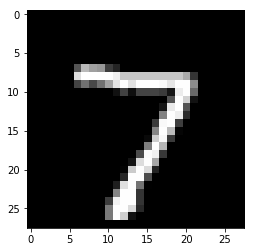

予測結果: 7


In [0]:
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import load_model
from IPython.display import Image, display
from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt

import numpy as np


num_classes = 10

(_, _), (x_test, y_test) = mnist.load_data()
x_test = x_test.astype('float32')
x_test /= 255
y_test = to_categorical(y_test, num_classes)

model = load_model("simple_mnist_dense_weight.h5")

pred = model.predict(x_test)


print('入力画像:')
imshow(x_test[0], 'gray')
plt.show()
print("予測結果: {}".format(np.argmax(pred[0])))

### 3.2節　畳み込み二ューラルネットワーク（CNN）

CNNの学習

In [0]:
!python3 simple_mnist_cnn.py

W0726 03:11:17.768231 139750781425536 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 9216)              

学習済みCNNによる予測  
**※MNISTの文字画像が上手く表示されないときは、下記コマンドセルを再実行してください。**

入力画像:


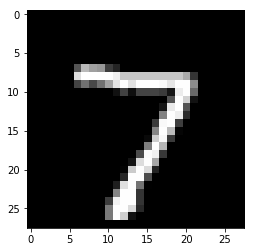

予測結果: 7


In [0]:
model = load_model("simple_mnist_cnn_weight.h5")
pred = model.predict(x_test.reshape(-1, 28, 28, 1))

print('入力画像:')
imshow(x_test[0], 'gray')

plt.show()
print("予測結果: {}".format(np.argmax(pred[0])))

### 3.3節　再帰型ニューラルネットワーク（RNN）

#### データの確認

In [0]:
!cat "movie_comment_sample.csv"

movie_comment,is_train
"感動 した 映画",1
"号泣 した 映画",1
"つまらない",0
"楽しく ない 映画",0
"楽しい 映画",1
"面白く ない 映画",0
"つまらない 映画",0

#### SimpleRNNの学習と予測

SimpleRNNの学習

In [0]:
!python3 simple_rnn.py

W0726 03:20:34.453734 140047995008896 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/initializers.py:119: calling RandomUniform.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0726 03:20:34.479662 140047995008896 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0726 03:20:34.615677 140047995008896 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/backend.py:3794: add_dispatch_support.<locals>.wrapper (from tensorflow.pytho

予測のための関数定義

In [0]:
import csv

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, SimpleRNN
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

vocab_size = 10
max_length = 4

def load_movie_comment_data():
    docs = csv.reader(open("movie_comment_sample.csv"))
    next(docs, None)
    docs = list(docs)
    texts = [d[0] for d in docs]
    labels = [int(d[1]) for d in docs]
    return texts, labels

def preprocessing(texts, labels):
    tokenizer = Tokenizer(vocab_size)
    tokenizer.fit_on_texts(texts)
    encoded_docs = tokenizer.texts_to_sequences(texts)
    padded_docs = pad_sequences(
        encoded_docs, maxlen=max_length, padding='post')

    train_padded_docs = padded_docs[:6]
    test_padded_docs = padded_docs[6:7]

    train_labels = labels[:6]
    test_labels = labels[6:7]
    return train_padded_docs, test_padded_docs, train_labels, test_labels

学習済みSimpleRNNによるポジネガ予測

In [0]:
texts, labels = load_movie_comment_data()
train_padded_docs, test_padded_docs, train_labels, test_labels = preprocessing(texts, labels)
model = load_model("simple_rnn_weight.h5")
preds = np.round(model.predict(test_padded_docs))

print('入力文: {}'.format(texts[6]))
print('id列に変換: {}'.format(test_padded_docs))

if preds == 0:
    print("予測結果: ネガティブ")
else:
    print("予測結果: ポジティブ")

W0726 03:21:34.739854 140102063245184 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/initializers.py:119: calling RandomUniform.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0726 03:21:34.777382 140102063245184 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:97: calling Orthogonal.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0726 03:21:34.916890 140102063245184 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/backend.py:3794: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.a

入力文: つまらない 映画
id列に変換: [[3 1 0 0]]
予測結果: ネガティブ


#### LSTMの学習と予測

LSTMの学習

In [0]:
!python3 simple_lstm.py

W0726 03:22:04.846859 140031129925504 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/initializers.py:119: calling RandomUniform.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0726 03:22:04.873198 140031129925504 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0726 03:22:05.115118 140031129925504 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/backend.py:3794: add_dispatch_support.<locals>.wrapper (from tensorflow.pytho

学習済みLSTMによるポジネガ予測

In [0]:
texts, labels = load_movie_comment_data()
train_padded_docs, test_padded_docs, train_labels, test_labels = preprocessing(texts, labels)
model = load_model("simple_lstm_weight.h5")
preds = np.round(model.predict(test_padded_docs))

print('入力文: {}'.format(texts[6]))
print('id列に変換: {}'.format(test_padded_docs))

if preds == 0:
    print("予測結果: ネガティブ")
else:
    print("予測結果: ポジティブ")

入力文: つまらない 映画
id列に変換: [[3 1 0 0]]
予測結果: ポジティブ


## 4章　深層強化学習（倒立振子制御）

### 4.1節　OpenAI Gym

In [0]:
import gym
env = gym.make('Pendulum-v0')
env.reset()
for i in range(3):
    action = env.action_space.sample()
    state, reward, done, info = env.step(action)
    print("action:{}, state:{}, reward:{}".format(action, state, reward))

action:[0.8704774], state:[-0.11715109  0.9931141   0.57539896], reward:-2.763656571317347
action:[0.08526979], state:[-0.18303427  0.98310653  1.33302501], reward:-2.8831924881190334
action:[-1.5575708], state:[-0.27242065  0.96217825  1.83671929], reward:-3.2596843594153793


### 4.2節　Deep Q-Networkによる制御

In [0]:
%cd /content/RL_Book/contents/4-2_dqn_pendulum/

/content/RL_Book/contents/4-2_dqn_pendulum


学習の実行  
**※ result/pendulum の下にフォルダを作って weight（.h5ファイル）を出力します。**

In [0]:
!python3 train.py

./result/pendulum/201907260324
W0726 03:24:45.213334 139932963379072 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_state (InputLayer)     [(None, 3)]               0         
_________________________________________________________________
hidden_1 (Dense)             (None, 30)                120       
_________________________________________________________________
hidden_2 (Dense)             (None, 24)                744       
_________________________________________________________________
hidden_3 (Dense)             

学習結果を使った予測制御  
**※予測動画を保存するため、xvfb-runというコマンドを先につけて実行します。**  
!xvfb-run -s "-screen 0 1280x720x24" python3 predict.py {weightのパス}

In [0]:
!xvfb-run -s "-screen 0 1280x720x24" python3 predict.py result/pendulum/201907260324/episode_300.h5

W0726 03:41:41.310072 139887941224320 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_state (InputLayer)     [(None, 3)]               0         
_________________________________________________________________
hidden_1 (Dense)             (None, 30)                120       
_________________________________________________________________
hidden_2 (Dense)             (None, 24)                744       
_________________________________________________________________
hidden_3 (Dense)             (None, 20)                500  

生成された動画ファイルを再生  
play_movie('{動画ファイルのパス}')  

**※以下のコマンドラインでは、参考のためサンプル動画ファイルのパスを指定してあります。  
予測結果を再生するには、予測して生成された動画ファイルのパスに書きかえて実行してください。**

In [0]:
# play_movie('result/pendulum/201907260324/movie/openaigym.video.0.1960.video000018.mp4')
play_movie('result/pendulum/201902201257/movie_sample/openaigym.video.0.1887.video000019.mp4')

### 4.3節　Actor-Critic法による制御

In [0]:
%cd /content/RL_Book/contents/4-3_ac_pendulum/

/content/RL_Book/contents/4-3_ac_pendulum


学習の実行  
**※ result の下にフォルダを作って weight（.h5ファイル）を出力します。**

In [0]:
!python3 train.py

NUM_STATE_3
NUM_ACTIONS_2
W0726 03:50:58.118044 139942366156672 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_state (InputLayer)     [(None, 3)]               0         
_________________________________________________________________
hidden_1 (Dense)             (None, 30)                120       
_________________________________________________________________
hidden_2 (Dense)             (None, 24)                744       
_________________________________________________________________
hidden_3 (Dense)             (None

学習結果を使った予測制御  
!xvfb-run -s "-screen 0 1280x720x24" python3 predict.py {weightのパス}

In [0]:
!xvfb-run -s "-screen 0 1280x720x24" python3 predict.py result/20190726_035059/batch_40000.h5

NUM_STATES_3
NUM_ACTIONS_2
W0726 05:09:51.167082 140146232956800 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_state (InputLayer)     [(None, 3)]               0         
_________________________________________________________________
hidden_1 (Dense)             (None, 30)                120       
_________________________________________________________________
hidden_2 (Dense)             (None, 24)                744       
_________________________________________________________________
hidden_3 (Dense)             (Non

生成された動画ファイルを再生  
play_movie('{動画ファイルのパス}')  

**※以下のコマンドラインでは、参考のためサンプル動画ファイルのパスを指定してあります。  
予測結果を再生するには、予測して生成された動画ファイルのパスに書きかえて実行してください。**

In [0]:
# play_movie('result/20190726_035059/batch_40000/movie/openaigym.video.0.3413.video000006.mp4')
play_movie('result/20190531_071034/batch_40000/movie_sample/openaigym.video.0.393.video000010.mp4')

## 5章　連続制御問題への応用

In [0]:
%cd /content/RL_Book/contents/5_walker2d/

/content/RL_Book/contents/5_walker2d


### 5.3節　ランダム制御による2足歩行

ランダム制御による2足歩行（報酬出力のみ）

In [0]:
!python3 src/walk_randomly.py

pybullet build time: Jul 26 2019 02:47:06
current_dir=/usr/local/lib/python3.6/dist-packages/pybullet_envs/bullet
WalkerBase::__init__
options= 
argv[0]=
reward:  0.281548012397252
reward:  0.8650345085770823
reward:  0.6495522812663694
reward:  0.3088576247784658
reward:  1.1403130594146205
reward:  1.4025659999926574
reward:  1.015616994992888
reward:  0.8434605410482618
reward:  0.4198053846179391
reward:  1.4137426478613633
reward:  1.5648713487840722
reward:  2.295143892049964
reward:  1.5808776823614608
reward:  0.7369893746392335
reward:  0.747195894808101
reward:  1.5530042428785236
reward:  1.1359120907887699
reward:  1.4936652183634578
reward:  -0.6816629895809455
episode done


ランダム制御による2足歩行（動画出力）  
**※フォルダ test を作って動画ファイルを出力します。** 

In [0]:
!xvfb-run -s "-screen 0 1280x720x24" python3 src/walk_randomly_movie.py

pybullet build time: Jul 26 2019 02:47:06
current_dir=/usr/local/lib/python3.6/dist-packages/pybullet_envs/bullet
WalkerBase::__init__
options= 
argv[0]=
startThreads creating 1 threads.
starting thread 0
started thread 0 
argc=3
argv[0] = --unused
argv[1] = 
argv[2] = --start_demo_name=Physics Server
ExampleBrowserThreadFunc started
X11 functions dynamically loaded using dlopen/dlsym OK!
X11 functions dynamically loaded using dlopen/dlsym OK!
Creating context
Created GL 3.3 context
Direct GLX rendering context obtained
Making context current
GL_VENDOR=VMware, Inc.
GL_RENDERER=llvmpipe (LLVM 8.0, 256 bits)
GL_VERSION=3.3 (Core Profile) Mesa 19.0.2
GL_SHADING_LANGUAGE_VERSION=3.30
pthread_getconcurrency()=0
Version = 3.3 (Core Profile) Mesa 19.0.2
Vendor = VMware, Inc.
Renderer = llvmpipe (LLVM 8.0, 256 bits)
b3Printf: Selected demo: Physics Server
startThreads creating 1 threads.
starting thread 0
started thread 0 
MotionThreadFunc thread started
ven = VMware, Inc.
ven = VMware, Inc.
b

生成された動画ファイルを再生  
play_movie('test/openaigym.video.0.***.video000002.mp4')

In [0]:
play_movie('test/openaigym.video.0.4049.video000002.mp4')

### 5.4節　ガウス方策とREINFORCEアルゴリズムによる2足歩行制御

本節のプログラムの学習には12時間以上をひつようとします。Docker環境においてノートブック 'demo.ipynb'に本節のコードセルが用意してあります。そちらをご利用ください。  

**参考までに、500000エピソード学習したモデルで予測制御した結果（動画）を貼っておきます。**

In [0]:
play_movie('result/walker2d/openaigym.video.0.34390.video000001.mp4')

## 6章　組合せ最適化への応用

### 6.2節　巡回セールスマン問題

In [0]:
%cd /content/RL_Book/contents/6-2_tsp/

/content/RL_Book/contents/6-2_tsp


学習の実行（デフォルト設定は --n_episodes 60000）  
**※ result の下に学習結果（model.xxxx.ckpt.xxxx）を出力します。**

In [0]:
!python3 train.py --n_episodes 5000

W0726 05:57:13.170996 139727758768000 deprecation_wrapper.py:119] From train.py:70: The name tf.Session is deprecated. Please use tf.compat.v1.Session instead.

2019-07-26 05:57:13.185397: I tensorflow/stream_executor/platform/default/dso_loader.cc:42] Successfully opened dynamic library libcuda.so.1
2019-07-26 05:57:13.205149: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:1005] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2019-07-26 05:57:13.205638: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1640] Found device 0 with properties: 
name: Tesla K80 major: 3 minor: 7 memoryClockRate(GHz): 0.8235
pciBusID: 0000:00:04.0
2019-07-26 05:57:13.205905: I tensorflow/stream_executor/platform/default/dso_loader.cc:42] Successfully opened dynamic library libcudart.so.10.0
2019-07-26 05:57:13.207376: I tensorflow/stream_executor/platform/default/dso_loader.cc:42] Successfully opened dynamic library

学習結果を使った探索（デフォルト設定は --n_episodes 5000）  
**※ モデルの学習結果のパス（result/model.xxxx.ckpt）を指定します。**

In [0]:
!python3 test.py --model_path result/model.002350--5.066-0.43924.ckpt --n_episodes 500

W0726 06:11:39.863272 139711915435904 deprecation_wrapper.py:119] From test.py:67: The name tf.Session is deprecated. Please use tf.compat.v1.Session instead.

2019-07-26 06:11:39.878955: I tensorflow/stream_executor/platform/default/dso_loader.cc:42] Successfully opened dynamic library libcuda.so.1
2019-07-26 06:11:39.899224: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:1005] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2019-07-26 06:11:39.899803: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1640] Found device 0 with properties: 
name: Tesla K80 major: 3 minor: 7 memoryClockRate(GHz): 0.8235
pciBusID: 0000:00:04.0
2019-07-26 06:11:39.900172: I tensorflow/stream_executor/platform/default/dso_loader.cc:42] Successfully opened dynamic library libcudart.so.10.0
2019-07-26 06:11:39.901695: I tensorflow/stream_executor/platform/default/dso_loader.cc:42] Successfully opened dynamic library 

探索結果の可視化（result/plot.png に出力）

In [0]:
!python3 plot.py

best tour length: 445.672


学習の推移を表すグラフと、学習結果による探索結果（巡回路）を表示します。  
**※以下のコマンドセルでは、参考のためサンプル画像のパスを指定してあります。学習結果を表示するには、パスの result_sample を result に書きかえて実行してください。**

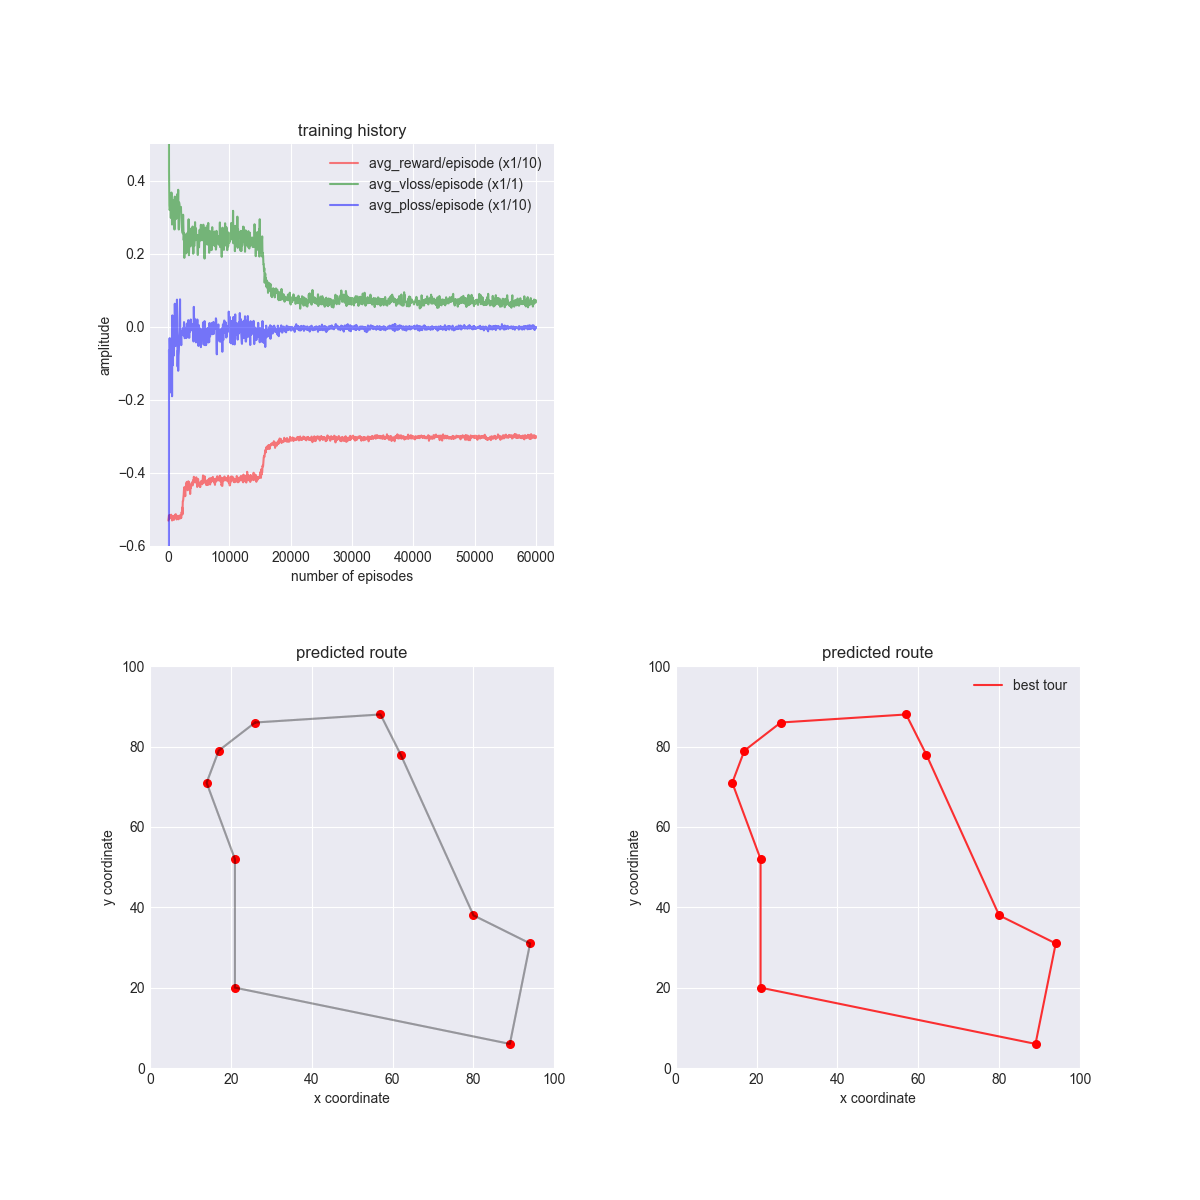

In [0]:
from IPython.display import Image, display_png

# 画像の読み込み
png = './result_sample/plot.png'

# 画像の表示
display_png(Image(png, width=600))

### 6.3節　ルービックキューブ問題

In [0]:
%cd /content/RL_Book/contents/6-3_rubiks_cube/

/content/RL_Book/contents/6-3_rubiks_cube


学習の実行（デフォルト設定は --n_episodes 150000 --n_steps 15）  
**※ result の下に学習結果（model.xxxx.ckpt.xxxx）を出力します。**

In [0]:
!python3 train.py --n_episodes 5000 --n_steps 15

W0726 06:14:21.370818 139918904223616 deprecation_wrapper.py:119] From train.py:79: The name tf.Session is deprecated. Please use tf.compat.v1.Session instead.

2019-07-26 06:14:21.385365: I tensorflow/stream_executor/platform/default/dso_loader.cc:42] Successfully opened dynamic library libcuda.so.1
2019-07-26 06:14:21.405292: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:1005] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2019-07-26 06:14:21.405810: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1640] Found device 0 with properties: 
name: Tesla K80 major: 3 minor: 7 memoryClockRate(GHz): 0.8235
pciBusID: 0000:00:04.0
2019-07-26 06:14:21.406161: I tensorflow/stream_executor/platform/default/dso_loader.cc:42] Successfully opened dynamic library libcudart.so.10.0
2019-07-26 06:14:21.407616: I tensorflow/stream_executor/platform/default/dso_loader.cc:42] Successfully opened dynamic library

学習結果を使った探索（デフォルト設定は --n_episodes 5000 --n_steps 15）  
**※ モデルの学習結果のパス（result/model.xxxx.ckpt）を指定します。**

In [0]:
!python3 test.py --model_path result/model.001900-0.104-19.22258.ckpt --n_episodes 500 --n_steps 15

W0726 06:18:25.590404 140583622080384 deprecation_wrapper.py:119] From test.py:71: The name tf.Session is deprecated. Please use tf.compat.v1.Session instead.

2019-07-26 06:18:25.604449: I tensorflow/stream_executor/platform/default/dso_loader.cc:42] Successfully opened dynamic library libcuda.so.1
2019-07-26 06:18:25.624588: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:1005] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2019-07-26 06:18:25.625182: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1640] Found device 0 with properties: 
name: Tesla K80 major: 3 minor: 7 memoryClockRate(GHz): 0.8235
pciBusID: 0000:00:04.0
2019-07-26 06:18:25.625536: I tensorflow/stream_executor/platform/default/dso_loader.cc:42] Successfully opened dynamic library libcudart.so.10.0
2019-07-26 06:18:25.626908: I tensorflow/stream_executor/platform/default/dso_loader.cc:42] Successfully opened dynamic library 

探索結果の可視化（result/plot.png に出力）

In [0]:
!python3 plot.py


### True Samples ###
Scrambles: 1,  41/ 41
 G | --[.u]--> | S
 G | <--[u]-- (-4.98) | S
Scrambles: 2,  60/ 60
 G | --[r]--> --[.f]--> | S
 G | <--[.r]-- (-4.37) <--[f]-- (-5.89) | S
Scrambles: 3,  64/ 64
 G | --[.f]--> --[u]--> --[f]--> | S
 G | <--[f]-- (-4.96) <--[.u]-- (-6.45) <--[.f]-- (-5.70) | S
Scrambles: 4,  39/ 39
 G | --[u]--> --[r]--> --[u]--> --[.f]--> | S
 G | <--[.u]-- (-5.56) <--[.r]-- (-5.80) <--[.u]-- (-6.28) <--[f]-- (-7.31) | S
Scrambles: 5,  49/ 58
 G | --[r]--> --[f]--> --[.f]--> --[.r]--> --[f]--> | S
 G | <--[.f]-- (-4.24) | S
Scrambles: 6,  33/ 44
 G | --[f]--> --[u]--> --[u]--> --[u]--> --[f]--> --[r]--> | S
 G | <--[.f]-- (-4.24) <--[u]-- (-5.51) <--[.f]-- (-6.21) <--[.r]-- (-6.26) | S
Scrambles: 7,  17/ 41
 G | --[f]--> --[r]--> --[.u]--> --[u]--> --[.f]--> --[r]--> --[.f]--> | S
 G | <--[.f]-- (-4.24) <--[.r]-- (-5.34) <--[f]-- (-5.50) <--[.r]-- (-5.52) <--[f]-- (-6.49) | S
Scrambles: 8,  21/ 55
 G | --[.u]--> --[.u]--> --[f]--> --[r]--> --[.f]--> --[.r]-->

学習の推移を表すグラフと、学習結果による探索性能のグラフを表示します。  
**※以下のコマンドセルでは、参考のためサンプル画像のパスを指定してあります。学習結果を表示するには、パスの result_sample を result に書きかえて実行してください。**

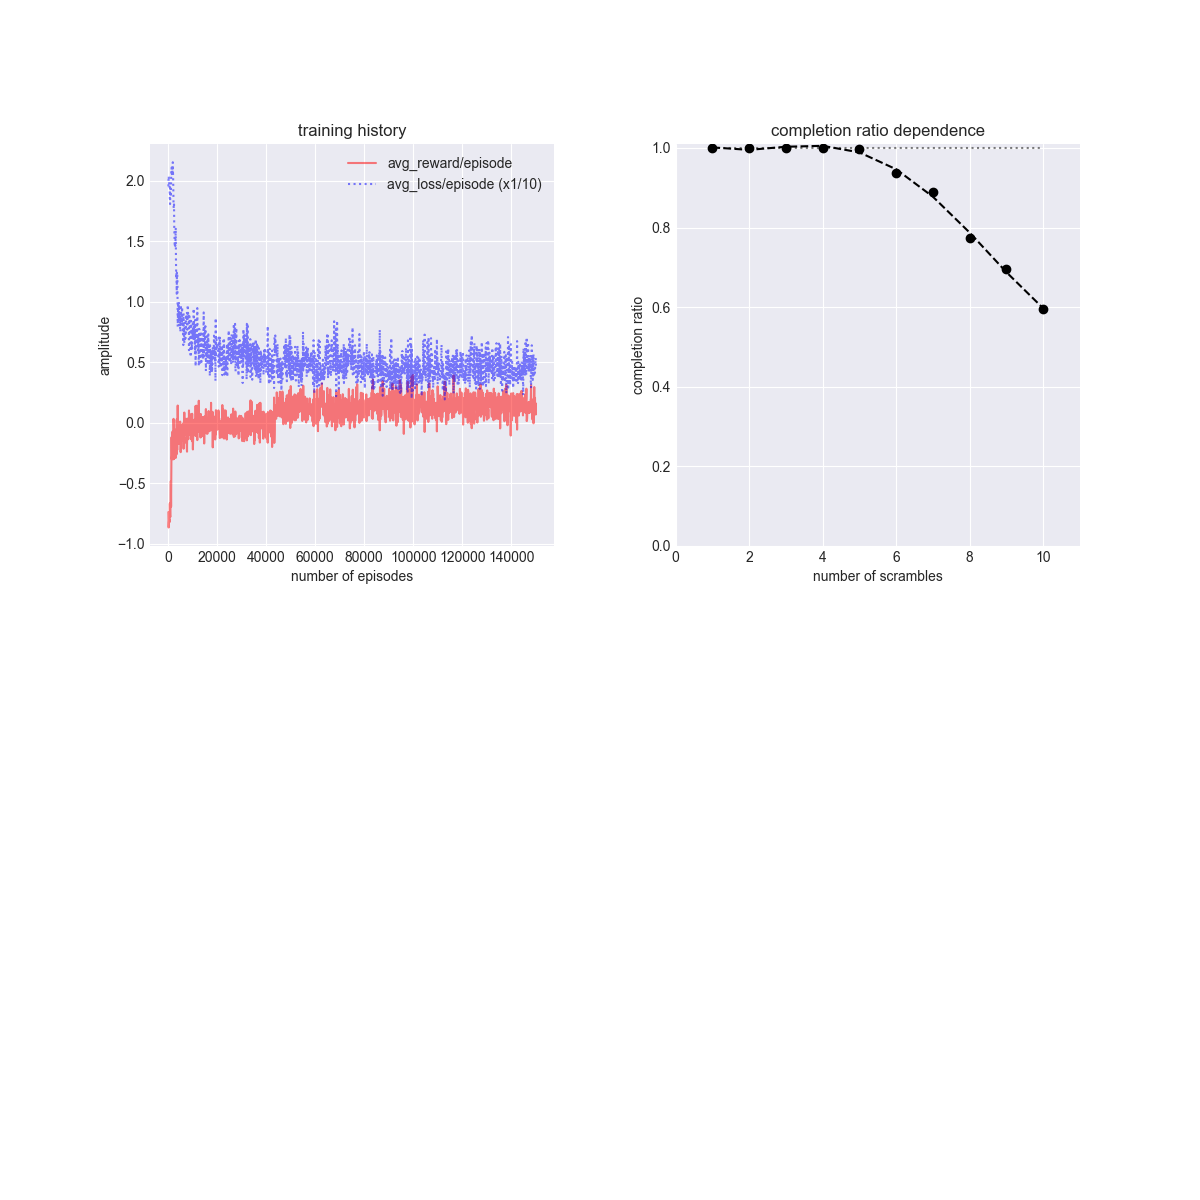

In [0]:
from IPython.display import Image, display_png

# 画像の読み込み
png = './result_sample/plot.png'

# 画像の表示
display_png(Image(png, width=600))

### ※ここで、ドライブをマウントして、これまでの実行結果を保存します。  

**《 ドライブをマウントする手順 》**  

1.   直下のコマンドセルを実行してください。URLと入力欄が表示されます。

2.  そのURLをクリックしてください。アカウントへのアクセス許可を問うページが表示されます。

3.   そのページ下にある「許可」をクリックすると認証コードが表示されたページが開きます。

4.   認証コードをコピーしたら、それを手順1の入力欄に張り付けてEnterしてください。  
/content/drive の下に ’My Drive’ がマウントされます。

In [0]:
from google.colab import drive
drive.mount('/content/drive')

'My Drive' の下にフォルダ Result_20190726 を作って、そこに contents フォルダを丸ごとコピーします。  
**※保存する容量は、最低でも200MBほどになります。ご注意ください。**

In [0]:
%cd /content/RL_Book
%mkdir /content/drive/'My Drive'/Result_20190726
%cp -rf contents /content/drive/'My Drive'/Result_20190726/

/content/RL_Book


## 7章　系列データ生成への応用

### 7.1節　SeqGANによる文書生成

In [0]:
%cd /content/RL_Book/contents/7-1_seqgan/

/content/RL_Book/contents/7-1_seqgan


SeqGANによる文書生成器の敵対的学習の実行（デフォルト設定は、g_episodes = 50, adversarial_nums = 10）  
**最新の学習結果により生成された文書は、data/generated_sentences.txt に出力されます。**

In [0]:
!python3 main.py

W0726 09:00:11.568156 140201755084672 deprecation_wrapper.py:119] From main.py:34: The name tf.Session is deprecated. Please use tf.compat.v1.Session instead.

2019-07-26 09:00:11.582571: I tensorflow/stream_executor/platform/default/dso_loader.cc:42] Successfully opened dynamic library libcuda.so.1
2019-07-26 09:00:11.608494: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:1005] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2019-07-26 09:00:11.608990: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1640] Found device 0 with properties: 
name: Tesla K80 major: 3 minor: 7 memoryClockRate(GHz): 0.8235
pciBusID: 0000:00:04.0
2019-07-26 09:00:11.609382: I tensorflow/stream_executor/platform/default/dso_loader.cc:42] Successfully opened dynamic library libcudart.so.10.0
2019-07-26 09:00:11.611026: I tensorflow/stream_executor/platform/default/dso_loader.cc:42] Successfully opened dynamic library 

SeqGANにより生成された文を表示します。  
**※以下のコマンドセルでは、参考のためサンプル画像のパスを指定してあります。学習結果を表示するには、パスの data/output_sample を data に書きかえて実行してください。**

In [0]:
!sed -n 1,16p ./data/output_sample/generated_sentences.txt

私 が 新しく 交際 の 間 に 物 を 解き ほどい て 断っ た の です 。 </S> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD>
玄関 から 違っ て 、 それ で は まだ 長く 話さ れる の です 。 </S> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD>
そうして 封じる 晩 の 時刻 は 次第に 衰え た 。 </S> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD>
「 愉快 だっ た の で も 見え まし た よ 」 と 身体 を わざわざ わざわざ 見え て くれ た 銀杏 に は 、
Ｋ は 真宗 の 坊さん を 打つ の 一語 で 、 いつ 人間 を 極め た 複雑 な 意義 さえ 手 だ 。 </S> <PAD>
私 が 先生 に 、 奥さん に対する 書い て 私 を お嬢さん を 開け た 。 </S> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD>
私 は その 問題 を 与え た の と いい まし た 。 </S> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD>
奥さん に は 万事 を もっ て 見極めよ う と する と 、 決して 東京 の 一部 に 伴う 特別 な 蛇 の ごとく どう
もし 今 まで 経過 し て よかっ た 私 も あっ た の です 。 </S> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD>
大した 風 がち な 意味 で 拵え た の です 。 </S> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD>
私 も 、 「 両手 で 話 を 手 に 出そ う か 」 と いっ た 。 </S> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD>
少し でも お嬢さん 

SeqGANの出力結果をドライブにコピーします。

In [0]:
%cp -rf data /content/drive/'My Drive'/Result_20190726/contents/7-1_seqgan/

### 7.2節　ENASによるニューラルネットワークアーキテクチャ探索

In [1]:
%cd /content/RL_Book/contents/7-2_enas/

/content/RL_Book/contents/7-2_enas


以下のコマンドを実行して画像データをダウンロードします。

In [2]:
!curl -O http://host.robots.ox.ac.uk/pascal/VOC/voc2012/VOCtrainval_11-May-2012.tar

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 1907M  100 1907M    0     0  13.3M      0  0:02:22  0:02:22 --:--:-- 13.5M


画像データの tar ファイルを解凍して得られたフォルダ VOCdevkit を data と改名します。

In [3]:
!tar -xvf VOCtrainval_11-May-2012.tar
%mv VOCdevkit data
!ls

VOCdevkit/
VOCdevkit/VOC2012/
VOCdevkit/VOC2012/Annotations/
VOCdevkit/VOC2012/Annotations/2007_000027.xml
VOCdevkit/VOC2012/Annotations/2007_000032.xml
VOCdevkit/VOC2012/Annotations/2007_000033.xml
VOCdevkit/VOC2012/Annotations/2007_000039.xml
VOCdevkit/VOC2012/Annotations/2007_000042.xml
VOCdevkit/VOC2012/Annotations/2007_000061.xml
VOCdevkit/VOC2012/Annotations/2007_000063.xml
VOCdevkit/VOC2012/Annotations/2007_000068.xml
VOCdevkit/VOC2012/Annotations/2007_000121.xml
VOCdevkit/VOC2012/Annotations/2007_000123.xml
VOCdevkit/VOC2012/Annotations/2007_000129.xml
VOCdevkit/VOC2012/Annotations/2007_000170.xml
VOCdevkit/VOC2012/Annotations/2007_000175.xml
VOCdevkit/VOC2012/Annotations/2007_000187.xml
VOCdevkit/VOC2012/Annotations/2007_000241.xml
VOCdevkit/VOC2012/Annotations/2007_000243.xml
VOCdevkit/VOC2012/Annotations/2007_000250.xml
VOCdevkit/VOC2012/Annotations/2007_000256.xml
VOCdevkit/VOC2012/Annotations/2007_000272.xml
VOCdevkit/VOC2012/Annotations/2007_000323.xml
VOCdevkit/VOC2012/A

エポック数を指定してENASを実行（結果は result/test と指定）、学習結果を自動でグラフ化します。

In [6]:
!python3 main.py -output_dir=./results/test -num_epochs=200 -image_dir=./data/VOC2012/JPEGImages/ -label_dir=./data/VOC2012/SegmentationClass/

--------------------------------------------------------------------------------
Path ./results/test does not exist. Creating.
Logging to ./results/test/stdout.txt
--------------------------------------------------------------------------------
Building Agent
W0729 04:30:14.416607 139758255839104 deprecation_wrapper.py:119] From /content/RL_Book/contents/7-2_enas/agent.py:50: The name tf.variable_scope is deprecated. Please use tf.compat.v1.variable_scope instead.

W0729 04:30:14.465061 139758255839104 deprecation_wrapper.py:119] From /content/RL_Book/contents/7-2_enas/agent.py:55: The name tf.get_variable is deprecated. Please use tf.compat.v1.get_variable instead.

--------------------------------------------------------------------------------
Build agent sampler
W0729 04:30:14.517893 139758255839104 deprecation.py:323] From /content/RL_Book/contents/7-2_enas/agent.py:92: multinomial (from tensorflow.python.ops.random_ops) is deprecated and will be removed in a future version.
Instr

出力結果のテキスト (results/test/stdout.txt) があれば、学習を中断しても以下のコマンドを実行して学習結果をグラフ化できます。

In [0]:
%mkdir test_visualize
%cp results/test/stdout.txt test_visualize/
!python3 utils.py -output_dir=./test_visualize

学習結果のプロットを表示します。  
**※以下のコマンドセルでは、参考のためサンプル画像のパスを指定してあります。学習結果を表示するには、パスの results_sample を results に書きかえて実行してください。**

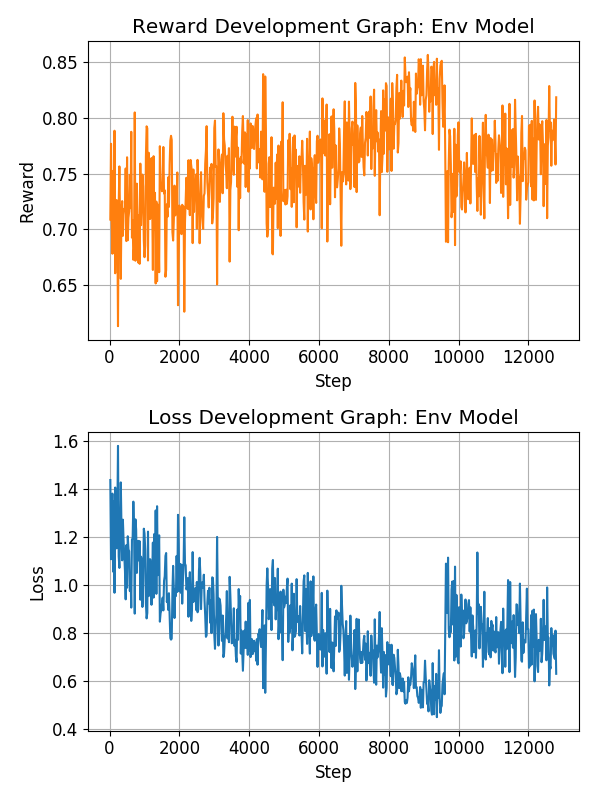

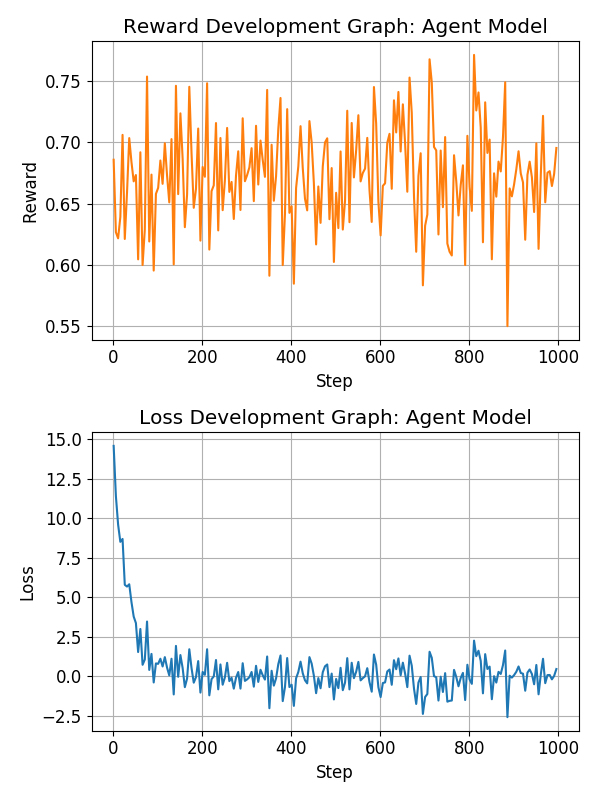

In [9]:
from IPython.display import Image, display_png

# 画像の読み込み
png1 = './results_sample/test/output_fig/env_development.png'
png2 = './results_sample/test/output_fig/agent_development.png'

# 画像の表示
display_png(Image(png1, width=400))
display_png(Image(png2, width=400))

ENASの学習結果および探索結果をドライブに保存します。  
**※保存する容量は、300MBほどになります。ご注意ください。**

In [0]:
%cp -rf results /content/drive/'My Drive'/Result_20190726/contents/7-2_enas

### 7.2節　ENAS探索結果の検証  
### ENAS探索で得られたベストアーキテクチャによるセマンティックセグメンテーション

#### 1．画像データの準備  
必要なライブラリをインポートします。

In [0]:
import csv
import os
import random
import sys

import matplotlib.pyplot as plt
%matplotlib inline
import cv2
import numpy as np
from keras.layers import (Input, Dense, Conv2D, SeparableConv2D,
                          AveragePooling2D, MaxPooling2D, UpSampling2D,
                          Activation, concatenate, Reshape)
from keras.layers.normalization import BatchNormalization
from keras.models import Model
from keras.callbacks import ModelCheckpoint, TensorBoard, CSVLogger
from keras.utils import plot_model
from keras import backend as K
from keras import metrics
import pandas as pd
from PIL import Image

Using TensorFlow backend.


画像データのパス、画像サイズ、クラス数を指定します。また、結果の出力先ディレクトリを指定します。

In [0]:
data_path = "data/VOC2012"
image_size = (128, 128)
num_classes = 22
input_size = (128, 128, 3)

ニューラルネットワークの固定情報（フィルタ数、層数）およびENAS探索で得られたベストアーキテクチャを指定します。

In [0]:
out_filters = 36
num_layers = 12
sample_arc = [0, 5, 5, 2, 2, 2, 4, 5, 3, 5, 3, 4]
save_root = "./output/20190425"

画像データを訓練用、検証用、テスト用に分けておきます。

In [0]:
# Get the filenames of training image and label data
img_path = os.path.join(data_path + "/JPEGImages/")
lbl_path = os.path.join(data_path + "/SegmentationClass/")

# Only use names from lbl_path since not all images are labeled
lbl_filename_list = os.listdir(lbl_path)
lbl_filename_list.sort()
img_filename_list = [lbl_filename.replace(".png", ".jpg") for lbl_filename in lbl_filename_list]

# Parameters
height = image_size[0]
width = image_size[1]
category = num_classes

# 70% train, 20% validation, 10% test
num_images = len(img_filename_list)
num_train = int(num_images * 0.7)
num_valid = int(num_images * 0.2)
num_test = num_images - num_train - num_valid
train_img_filename_list = img_filename_list[0:num_train]
valid_img_filename_list = img_filename_list[num_train:num_train + num_valid]
test_img_filename_list = img_filename_list[num_images - num_test:num_images]
train_lbl_filename_list = lbl_filename_list[0:num_train]
valid_lbl_filename_list = lbl_filename_list[num_train:num_train + num_valid]
test_lbl_filename_list = lbl_filename_list[num_images - num_test:num_images]

batch_size = 16
train_steps_per_epoch = num_train // batch_size
valid_steps_per_epoch = num_valid // batch_size

# Open all test images and labels
test_images = np.zeros((len(test_img_filename_list), height, width, 3), dtype="float32")
test_labels = []
for index in range(len(test_img_filename_list)):
    test_img = Image.open(os.path.join(img_path, test_img_filename_list[index]))
    test_img = np.array(test_img)
    test_img = cv2.resize(test_img, (height, width))  # Resize
    test_img = test_img / 255.0   # Normalize
    test_images[index, :, :, :] = test_img

    test_lbl = Image.open(os.path.join(lbl_path, test_lbl_filename_list[index]))
    test_lbl = test_lbl.resize((height, width))
    test_lbl = np.asarray(test_lbl)
    test_labels.append(test_lbl)

test_labels = np.asarray(test_labels, dtype=np.uint8)

# Change indices which correspond to "void" from 255
test_labels = np.where(test_labels == 255, 21, test_labels)
np.set_printoptions(threshold=sys.maxsize)

# Convert to one hot encoding
identity = np.identity(category, dtype=np.uint8)
test_labels = identity[test_labels]

print("test_img.shape  = " + str(test_images.shape))
print("test_lbl.shape  = " + str(test_labels.shape))

test_img.shape  = (292, 128, 128, 3)
test_lbl.shape  = (292, 128, 128, 22)


#### 2．画像 Generator の準備  
訓練用画像の generator（訓練用プログラムに画像を渡す役割を担う）を定義します。

In [0]:
def train_input_generator():
    while 1:
        train_images = np.zeros((batch_size, height, width, 3), dtype="float32")
        train_labels = np.zeros((batch_size, height, width))

        shuffled_index = list(range(num_train))
        random.shuffle(shuffled_index)
        batch_idx = 0

        for i in shuffled_index:
            # Read training images
            train_img = Image.open(os.path.join(img_path, train_img_filename_list[i]))
            train_img = np.array(train_img)
            train_img = cv2.resize(train_img, (height, width))  # Resize
            train_img = train_img / 255.0  # Normalize

            # Read training labels
            train_lbl = Image.open(os.path.join(lbl_path, train_lbl_filename_list[i]))
            train_lbl = train_lbl.resize((height, width))

            # Flip
            do_flip = random.choice([True, False])
            if do_flip:
                train_img = cv2.flip(train_img, 1)
                train_lbl = train_lbl.transpose(Image.FLIP_LEFT_RIGHT)

            # Random Crop
            do_random_crop = random.choice([True, False])
            if do_random_crop:
                x_start = random.randint(0, width/2)
                y_start = random.randint(0, height/2)
                train_img = train_img[y_start:y_start+int(height/2), x_start:x_start+int(width/2)]
                train_img = cv2.resize(train_img, (height, width))
                train_lbl = train_lbl.crop((x_start, y_start, x_start+int(width/2), y_start+int(height/2)))
                train_lbl = train_lbl.resize((height, width))

            train_lbl = np.asarray(train_lbl)
            np.set_printoptions(threshold=sys.maxsize)
            train_images[batch_idx % batch_size] = train_img
            train_labels[batch_idx % batch_size] = train_lbl

            batch_idx += 1
            if (batch_idx % batch_size) == 0:
                train_labels_onehot = np.asarray(train_labels, dtype=np.uint8)
                # Change indices which correspond to "void" from 255
                train_labels_onehot = np.where(train_labels_onehot == 255, 21, train_labels_onehot)
                np.set_printoptions(threshold=sys.maxsize)

                # Convert to one hot encoding
                identity = np.identity(category, dtype=np.uint8)
                train_labels_onehot = identity[train_labels_onehot]

                yield (np.array(train_images), np.array(train_labels_onehot))

検証用画像の generator（訓練用プログラムに画像を渡す役割を担う）を定義します。

In [0]:
def validation_input_generator():
    while 1:
        valid_images = np.zeros((batch_size, height, width, 3), dtype="float32")
        valid_labels = np.zeros((batch_size, height, width))

        shuffled_index = list(range(num_valid))
        random.shuffle(shuffled_index)
        batch_idx = 0

        for i in shuffled_index:
            # Read training images
            valid_img = Image.open(os.path.join(img_path, valid_img_filename_list[i]))
            valid_img = np.array(valid_img)
            valid_img = cv2.resize(valid_img, (height, width))  # Resize
            valid_img = valid_img / 255.0  # Normalize

            # Read training labels
            valid_lbl = Image.open(os.path.join(lbl_path, valid_lbl_filename_list[i]))
            valid_lbl = valid_lbl.resize((height, width))

            valid_lbl = np.asarray(valid_lbl)
            np.set_printoptions(threshold=sys.maxsize)
            valid_images[batch_idx % batch_size] = valid_img
            valid_labels[batch_idx % batch_size] = valid_lbl

            batch_idx += 1
            if (batch_idx % batch_size) == 0:
                valid_labels_onehot = np.asarray(valid_labels, dtype=np.uint8)
                # Change indices which correspond to "void" from 255
                valid_labels_onehot = np.where(valid_labels_onehot == 255, 21, valid_labels_onehot)
                np.set_printoptions(threshold=sys.maxsize)

                # Convert to one hot encoding
                identity = np.identity(category, dtype=np.uint8)
                valid_labels_onehot = identity[valid_labels_onehot]

                yield (np.array(valid_images), np.array(valid_labels_onehot))

#### 3．ENAS探索結果による深層ネットワーク（ENAS-Net）の構築  
ENAS探索のベストアーキテクチャを読み込んで、深層ネットワークを構築します。

In [0]:
def enas_facory(
        input_size,
        out_filters,
        num_layers,
        sample_arc,
        num_classes=22):
    
    pool_distance = num_layers // 4
    pool_layers = [pool_distance - 1, 2 * pool_distance - 1, 3 * pool_distance - 1]

    
    def conv_branch(x, kernel_size=(3, 3), separable=False, dilation_rate=2, out_filters=36):
        x = Conv2D(out_filters, (1, 1), padding='same')(x)
        x = BatchNormalization()(x)
        x = Activation('relu')(x)
        if separable == False:
            x = Conv2D(out_filters, kernel_size, dilation_rate=dilation_rate, padding='same')(x)
        else:
            x = SeparableConv2D(out_filters, kernel_size, strides=(1, 1), padding='same', 
                                depth_multiplier=1, use_bias=False)(x)
        x = BatchNormalization()(x)
        x = Activation('relu')(x)
        return x

    
    def pool_branch(x, avg_or_max='max', out_filters=36):
        x = Conv2D(out_filters, (1, 1), padding='same')(x)
        x = BatchNormalization()(x)
        x = Activation('relu')(x)
        if avg_or_max == 'avg':
            x = AveragePooling2D((3, 3), strides=(1, 1), padding='same')(x)
        elif avg_or_max == 'max':
            x = MaxPooling2D((3, 3), strides=(1, 1), padding='same')(x)
        else:
            raise ValueError("Unknown pool {}".format(avg_or_max))
        return x

    
    def enas_layer(x, out_filters):
        enas_layers = []
        enas_layers.append(conv_branch(x, (3, 3), separable=False, dilation_rate=1, out_filters=out_filters))
        enas_layers.append(conv_branch(x, (3, 3), separable=True, out_filters=out_filters))
        enas_layers.append(conv_branch(x, (5, 5), separable=False, dilation_rate=1, out_filters=out_filters))
        enas_layers.append(conv_branch(x, (5, 5), separable=True, out_filters=out_filters))
        enas_layers.append(pool_branch(x, 'avg', out_filters=out_filters))
        enas_layers.append(pool_branch(x, 'max', out_filters=out_filters))
        return enas_layers
    

    # Input placeholder
    def build_input_layer(input_size):
        return Input(shape=input_size, name='input')

    # Encoder layers
    layers = []
    
    
    def build_encoding_layers(x):
        # Stem convolution
        x = Conv2D(out_filters, (3, 3), padding='same')(x)
        x = BatchNormalization()(x)
        # Encoder layers
        for layer_id in range(num_layers):
            x = enas_layer(x, out_filters)[sample_arc[layer_id]]
            if layer_id in pool_layers:
                x = MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same')(x)
            layers.append(x)
        return x

    
    # Decoder layers with long skip connections
    def build_decoding_layers(x):
        # Decorder layers
        for layer_id in reversed(range(num_layers)):
            x = enas_layer(x, out_filters)[sample_arc[layer_id]]
            if layer_id in pool_layers:
                x = UpSampling2D(size=(2, 2))(x)
                x = concatenate([x,layers[layer_id - 1]], axis=3)
                x = Conv2D(out_filters, (1, 1), padding='same')(x)
            layers.append(x)
        
        # end convolution
        x = Conv2D(num_classes, (1, 1), padding='same', activation='softmax')(x)
        x = Reshape((input_size[0], input_size[1], num_classes), name='conv-output-reshape')(x)
        return x

    # 入力と出力を指定してモデルを作成
    input_img = build_input_layer(input_size)
    encoded = build_encoding_layers(input_img)
    decoded = build_decoding_layers(encoded)
    model = Model(inputs=input_img, outputs=decoded)

    # 損失関数、最適化手法、監視メトリクスの設定    
    model.compile(
        optimizer='adam',
        #loss='mean_squared_error',
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

    return model

モデル構築とサマリーの書き出し

In [0]:
enas_unet = enas_facory(input_size, out_filters, num_layers, sample_arc)
enas_unet.summary()

W0726 18:07:59.156458 139918396499840 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0726 18:07:59.217132 139918396499840 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0726 18:07:59.219423 139918396499840 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0726 18:07:59.264283 139918396499840 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W0726 18:07:59.265816 1399183964

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input (InputLayer)              (None, 128, 128, 3)  0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 128, 128, 36) 1008        input[0][0]                      
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 128, 128, 36) 144         conv2d_1[0][0]                   
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 128, 128, 36) 1332        batch_normalization_1[0][0]      
__________________________________________________________________________________________________
batch_norm

#### 4．ENAS-Net の学習  
callback 関数の定義

In [0]:
def get_callbacks(save_root):
    if not os.path.exists(save_root):
        os.makedirs(save_root)
    tensorboard_dir = os.path.join(save_root, 'tensorboard')
    checkpoint_path = os.path.join(save_root, 'weights.{epoch:02d}-{val_loss:.4f}-{val_acc:.4f}.hdf5')
    csv_path = os.path.join(save_root, 'log.csv')
    
    # TensorBoard
    tensorboard = TensorBoard(log_dir=tensorboard_dir)
    
    # エポックごとの自動セーブ
    model_checkpoint = ModelCheckpoint(filepath=checkpoint_path, verbose=1)
    
    # Save best model
    best_model = ModelCheckpoint(os.path.join(save_root,'best_model_weights.hdf5'), 
                                 monitor='val_loss', verbose=1, save_best_only=True)
    
    # csv結果出力
    csv_logger = CSVLogger(filename=csv_path)
    
    callbacks = [tensorboard, model_checkpoint, csv_logger, best_model]
    
    return callbacks

ENAS探索で得られたベストアーキテクチャの深層ネットワークを学習します。

In [0]:
# callback関数の生成
callbacks = get_callbacks(save_root)

# モデル構築
enas_unet = enas_facory(input_size, out_filters, num_layers, sample_arc)

# 学習回数（エポック数）を指定（1000回以上が望ましいが、試すだけなら100回で十分）
num_epoch = 100

# 学習の実行
enas_unet.fit_generator(generator=train_input_generator(), steps_per_epoch=train_steps_per_epoch, 
                        epochs=num_epoch, validation_data=validation_input_generator(), 
                        validation_steps=valid_steps_per_epoch, callbacks=callbacks)

W0726 18:09:22.611417 139918396499840 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0726 18:09:57.715903 139918396499840 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/callbacks.py:850: The name tf.summary.merge_all is deprecated. Please use tf.compat.v1.summary.merge_all instead.

W0726 18:09:57.717736 139918396499840 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/callbacks.py:853: The name tf.summary.FileWriter is deprecated. Please use tf.compat.v1.summary.FileWriter instead.



Epoch 1/100
127/127 [==============================] - 73s 572ms/step - loss: 1.8693 - acc: 0.6018 - val_loss: 1.6168 - val_acc: 0.6520

Epoch 00001: saving model to ./output/20190425/weights.01-1.6168-0.6520.hdf5

Epoch 00001: val_loss improved from inf to 1.61680, saving model to ./output/20190425/best_model_weights.hdf5
Epoch 2/100
127/127 [==============================] - 60s 469ms/step - loss: 1.5612 - acc: 0.6433 - val_loss: 1.5453 - val_acc: 0.6569

Epoch 00002: saving model to ./output/20190425/weights.02-1.5453-0.6569.hdf5

Epoch 00002: val_loss improved from 1.61680 to 1.54535, saving model to ./output/20190425/best_model_weights.hdf5
Epoch 3/100
127/127 [==============================] - 60s 472ms/step - loss: 1.5586 - acc: 0.6323 - val_loss: 1.7371 - val_acc: 0.6577

Epoch 00003: saving model to ./output/20190425/weights.03-1.7371-0.6577.hdf5

Epoch 00003: val_loss did not improve from 1.54535
Epoch 4/100
127/127 [==============================] - 60s 469ms/step - loss: 1.

#### 5．学習済み ENAS-Net によるセマンティックセグメンテーション  
学習済みネットワークによるセマンティックセグメンテーションのテストに必要な関数を定義します。

In [0]:
##########
# セマンティックセグメンテーションの実施と可視化のための関数
##########
def plot_test(model, test_img, test_lbl):
    X = test_img
    Y = test_lbl
    num_classes = Y.shape[-1]
    predicted = model.predict(X)
    
    max_class = np.argmax(predicted[0], axis=-1)
    y_true = np.argmax(Y[0], axis=-1)
    
    conj_mat = np.zeros((num_classes, num_classes))
    for x in range(X.shape[1]):
        for y in range(X.shape[2]):
            conj_mat[y_true[x,y], max_class[x,y]] += 1
    
    # Original image
    fig = plt.figure(figsize=(12, 4))
    ax = fig.add_subplot(131)
    ax.imshow(X[0])
    ax.set_title('org image')
    ax.set_axis_off()
    
    # Ground truth
    ax = fig.add_subplot(132)
    ax.imshow(y_true)
    ax.set_title('ground truth')
    ax.set_axis_off()
    
    # Predicted image
    ax = fig.add_subplot(133)
    ax.imshow(max_class)
    ax.set_title('predicted')
    ax.set_axis_off()
    
    return conj_mat

##########
# セマンティックセグメンテーション実施結果の性能指標を計算する関数
##########
def calc_metrics(conj_mat):
    num_truth = np.sum(conj_mat, axis=1)
    num_predict = np.sum(conj_mat, axis=0)

    R_met = []
    P_met = []
    F_met = []
    IOU = []
    A_met = 0
    
    for cat in range(conj_mat.shape[0]):
        if num_predict[cat] != 0:
            p = conj_mat[cat,cat]/num_predict[cat]
        else:
            p = 0
        r = conj_mat[cat,cat]/num_truth[cat]
        A_met += conj_mat[cat,cat]
        if p + r != 0:
            f = 2*p*r/(p+r)
        else:
            f = 0
        P_met.append(p)
        R_met.append(r)
        F_met.append(f)
        IOU.append(f/(2-f))
    
    A_met /= np.sum(num_truth)
    mean_IOU = sum(IOU)/len(IOU)

    print("Accuracy: " + str(np.round(A_met*10000,0)/100))
    print("mean_IOU: " + str(np.round(mean_IOU*10000,0)/100))
    print("avg_Precision: " + str(np.round(10000*np.mean(P_met),0)/100))
    print("avg_Recall: " + str(np.round(10000*np.mean(R_met),0)/100))
    print("avg_F-measure: " + str(np.round(10000*np.mean(F_met),0)/100))
    print("Precision: " + str([np.round(p * 10000,0)/100 for i, p in enumerate(P_met)]))
    print("Recall: " + str([np.round(r * 10000,0)/100 for i, r in enumerate(R_met)]))
    print("F-measure: " + str([np.round(f * 10000,0)/100 for i, f in enumerate(F_met)]))
    print("IOU: " + str([np.round(f * 10000,0)/100 for i, f in enumerate(IOU)]))

学習結果の読み込み

In [0]:
# Load the best model
enas_unet.load_weights(os.path.join(save_root, "best_model_weights.hdf5"))

ベストアーキテクチャの深層ネットワーク（学習済み）を用いたセマンティックセグメンテーションのテストを実施します。  
**※次のセルの実行結果には、VOC2012の画像が表示されます。著作権の都合上、この配布用サンプルからは出力結果を削除しました。**

In [0]:
conj_mat = np.zeros((num_classes, num_classes))

for i in range(len(test_images)):
    image = np.array([test_images[i]])
    label = np.array([test_labels[i]])
    conj_mat += plot_test(enas_unet, image, label)

テスト結果のファイル出力

In [0]:
result = pd.DataFrame(conj_mat)
result.to_csv(os.path.join(save_root, 'result_renew.csv'))

性能指標の表示  
**※以下の出力のうち、Precision, Recall, F-measureは、22クラスごとの数値が以下の順に並んでいます。**  

id	物体クラス  
0	background  
1	aeroplane  
2	bicycle  
3	bird  
4	boad  
5	bottle  
6	bus  
7	car  
8	cat  
9	chair  
10	cow  
11	dining table  
12	dog  
13	horse  
14	motor bike  
15	person  
16	potted plant  
17	sheep  
18	sofa  
19	train  
20	tv/monitor  
21	(void)**

In [0]:
calc_metrics(conj_mat)

Accuracy: 71.73
mean_IOU: 14.54
avg_Precision: 30.04
avg_Recall: 21.5
avg_F-measure: 22.0
Precision: [78.34, 58.7, 0.0, 16.33, 3.54, 0.0, 50.31, 66.57, 40.53, 0.0, 28.06, 59.67, 18.48, 9.61, 25.43, 52.16, 12.55, 35.91, 0.0, 26.76, 41.86, 36.12]
Recall: [95.46, 27.79, 0.0, 0.19, 0.44, 0.0, 30.11, 20.71, 50.42, 0.0, 46.31, 12.47, 2.03, 4.16, 36.23, 66.53, 1.05, 45.53, 0.0, 12.52, 15.55, 5.51]
F-measure: [86.06, 37.72, 0.0, 0.37, 0.78, 0.0, 37.67, 31.59, 44.94, 0.0, 34.94, 20.63, 3.65, 5.81, 29.88, 58.48, 1.94, 40.16, 0.0, 17.06, 22.68, 9.57]
IOU: [75.53, 23.25, 0.0, 0.19, 0.39, 0.0, 23.21, 18.76, 28.98, 0.0, 21.17, 11.5, 1.86, 2.99, 17.57, 41.32, 0.98, 25.12, 0.0, 9.32, 12.79, 5.02]


ENAS-Netの学習結果およびセマンティックセグメンテーション実施結果をドライブに保存します。  
**※保存する容量は、400MBほどになります。ご注意ください。**

In [0]:
%cp -rf output /content/drive/'My Drive'/Result_20190726/contents/7-2_enas/